In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib_inline
import pandas as pd
import seaborn as sns

import is3_broker_rl
from is3_broker_rl.api.dto import Action

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
sns.set_style("whitegrid")

In [2]:
DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"
TRIAL_1_DIR = DATA_DIR / "trial_1"

In [3]:
df_action = pd.read_csv(TRIAL_1_DIR / "consumption_action.csv")
df_reward = pd.read_csv(TRIAL_1_DIR / "consumption_reward.csv")

In [4]:
ACTION_VALUE_MAPPING = {a.name: a.value for a in Action}

In [5]:
def plot_action_counts(df_action):
    fig, ax = plt.subplots(figsize=(16, 9))
    sns.countplot(x="action", data=df_action, ax=ax, order=ACTION_VALUE_MAPPING.values())
    ax.set_xticklabels(ACTION_VALUE_MAPPING.keys())
    ax.set_xlabel("Action type")
    ax.set_ylabel("Count")
    ax.set_title("Action distribution")

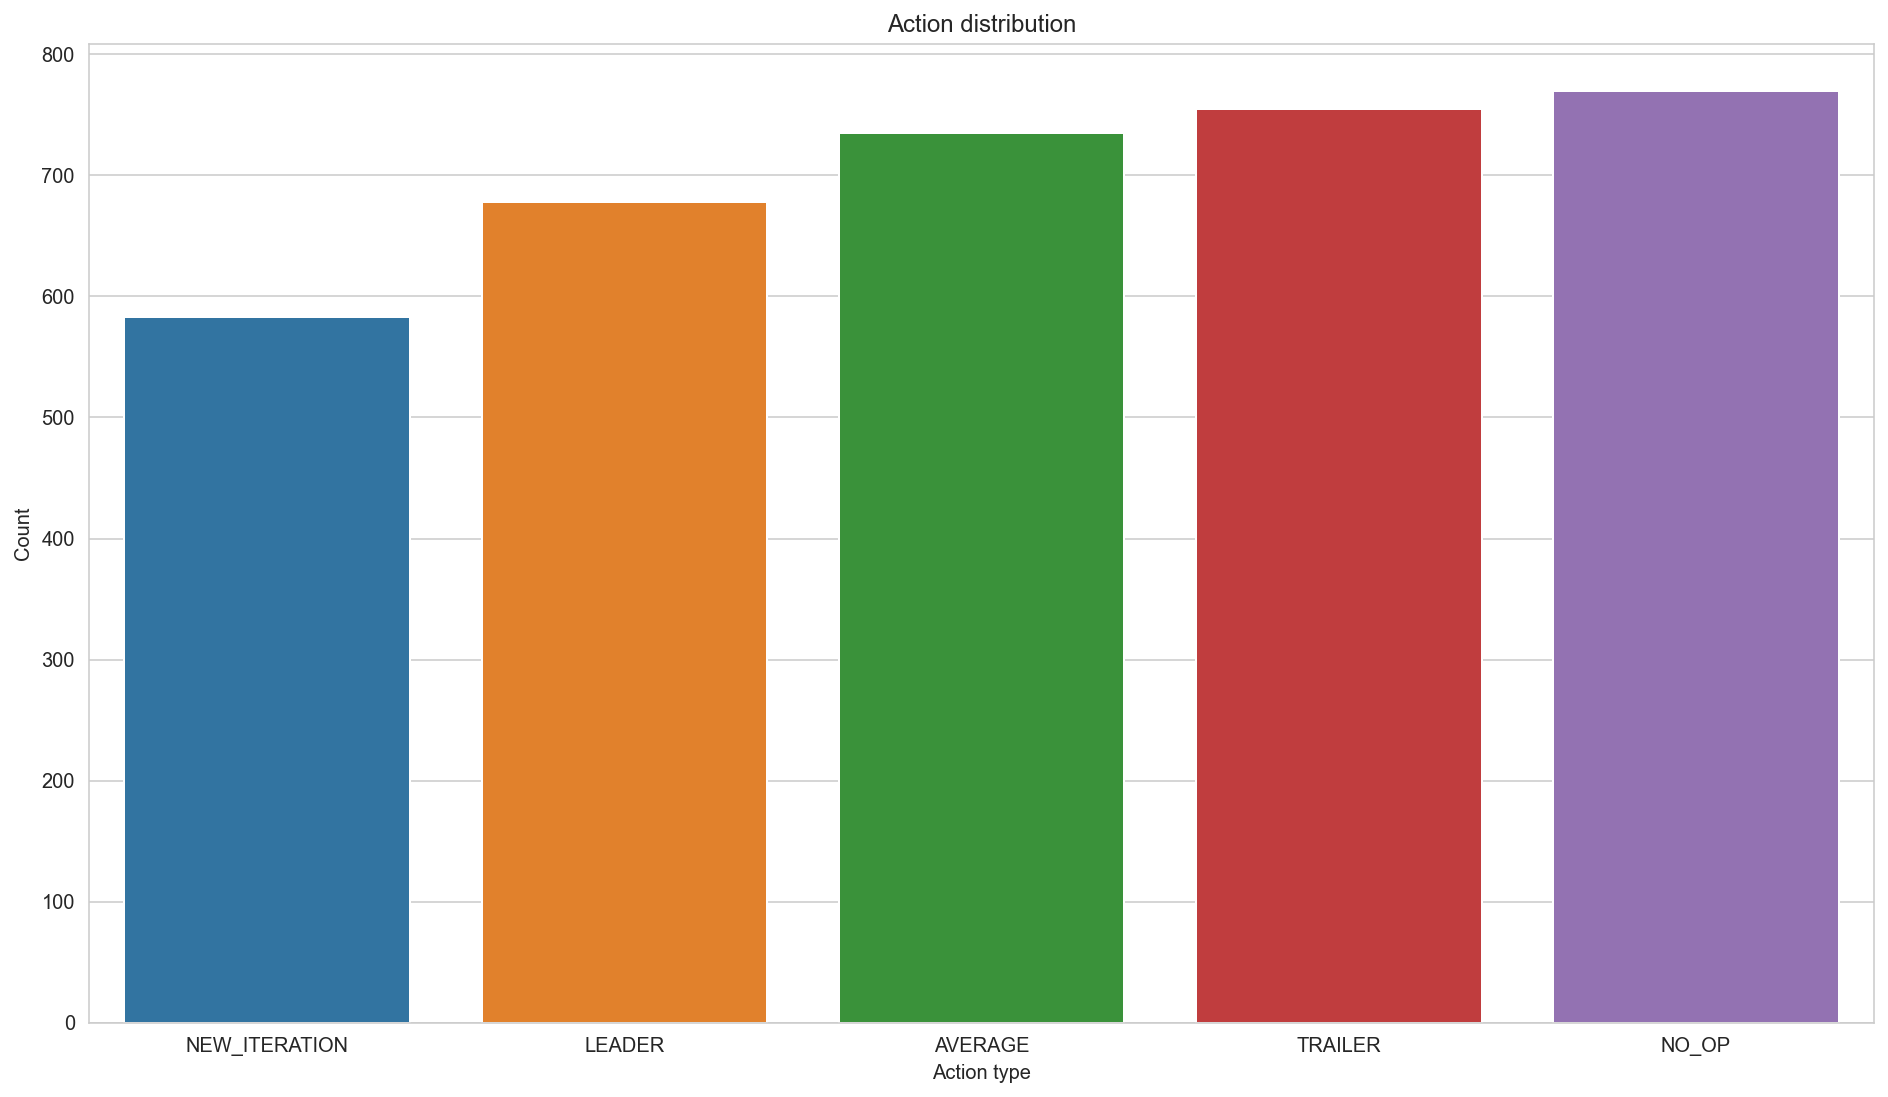

In [6]:
plot_action_counts(df_action)

In [7]:
def plot_action_count_over_time(df_action):
    fig, axs = plt.subplots(figsize=(21, 14), nrows=len(ACTION_VALUE_MAPPING))
    action_value_counts = (
        df_action[["gameId", "action"]]
        .groupby(["gameId", "action"], sort=False)
        .size()
        .unstack(fill_value=0)
        .reset_index(drop=True)
    )
    for i, action_value in enumerate(ACTION_VALUE_MAPPING.values()):
        ax = axs.flat[i]
        sns.lineplot(data=action_value_counts[action_value], ax=ax)
        ax.set_title(f"Number of action={list(ACTION_VALUE_MAPPING.keys())[action_value]} over time for each game")
        ax.set_xlabel("Game number")
        ax.set_ylabel("Action count")
    fig.tight_layout()

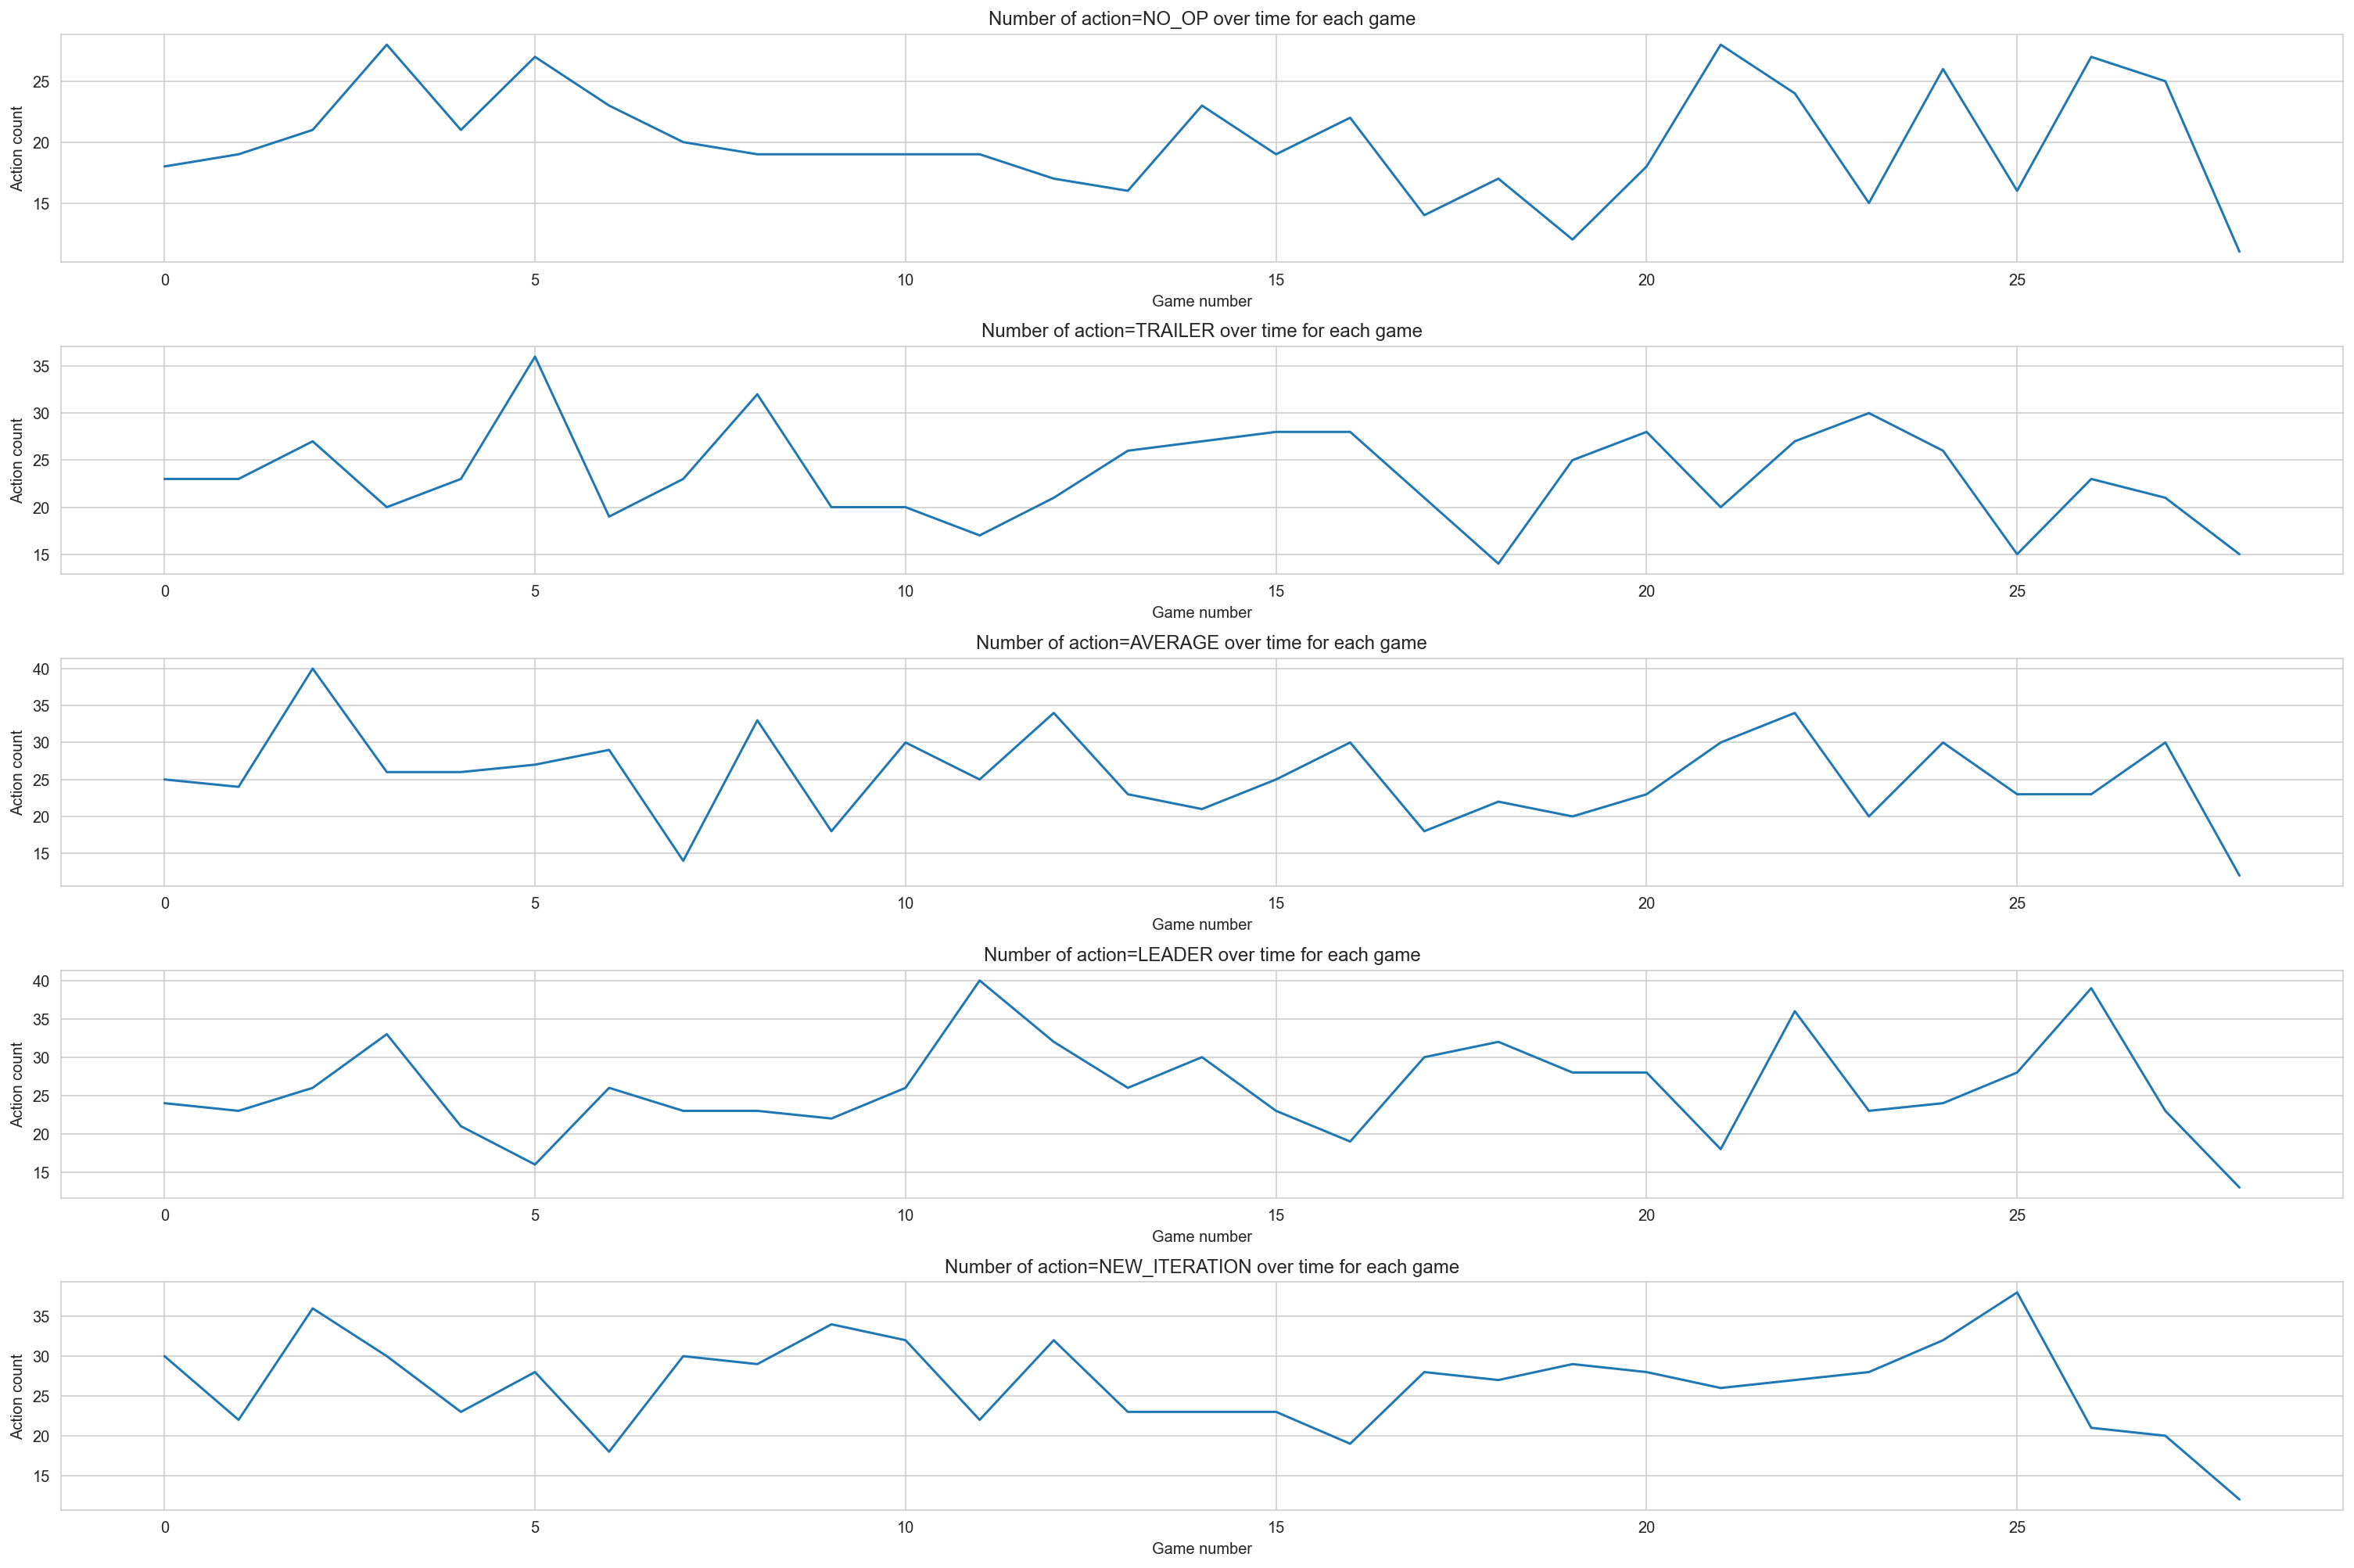

In [8]:
plot_action_count_over_time(df_action)

In [9]:
def plot_episode_reward(df_reward, df_action):
    fig, ax = plt.subplots(figsize=(21, 11))
    df_mean_episode_reward = df_reward.groupby("episode_id", sort=False).mean().reset_index()
    df_max_episode_reward = df_reward.groupby("episode_id", sort=False).max().reset_index()
    df_min_episode_reward = df_reward.groupby("episode_id", sort=False).min().reset_index()
    sns.lineplot(
        x=df_mean_episode_reward.index, y="reward", data=df_mean_episode_reward, ax=ax, label="Mean episode reward"
    )
    sns.lineplot(
        x=df_max_episode_reward.index, y="reward", data=df_max_episode_reward, ax=ax, label="Max episode reward"
    )
    sns.lineplot(
        x=df_min_episode_reward.index, y="reward", data=df_min_episode_reward, ax=ax, label="Min episode reward"
    )
    df_episode_game_id = df_reward.groupby("episode_id", sort=False)["gameId"].first().reset_index()
    ax.vlines(
        df_episode_game_id[df_episode_game_id["gameId"].shift() != df_episode_game_id["gameId"]].index,
        0,
        1,
        transform=ax.get_xaxis_transform(),
        colors="r",
        alpha=0.3,
        label="New game",
    )
    ax.set_xlabel("Episode")
    ax.set_ylabel("Aggregated reward")
    ax.legend()
    ax.set_title(f"Episode reward (N_EPISODES: {df_reward['episode_id'].nunique()}, N_TIMESTEPS: {len(df_action)})")
    ax.margins(x=0)

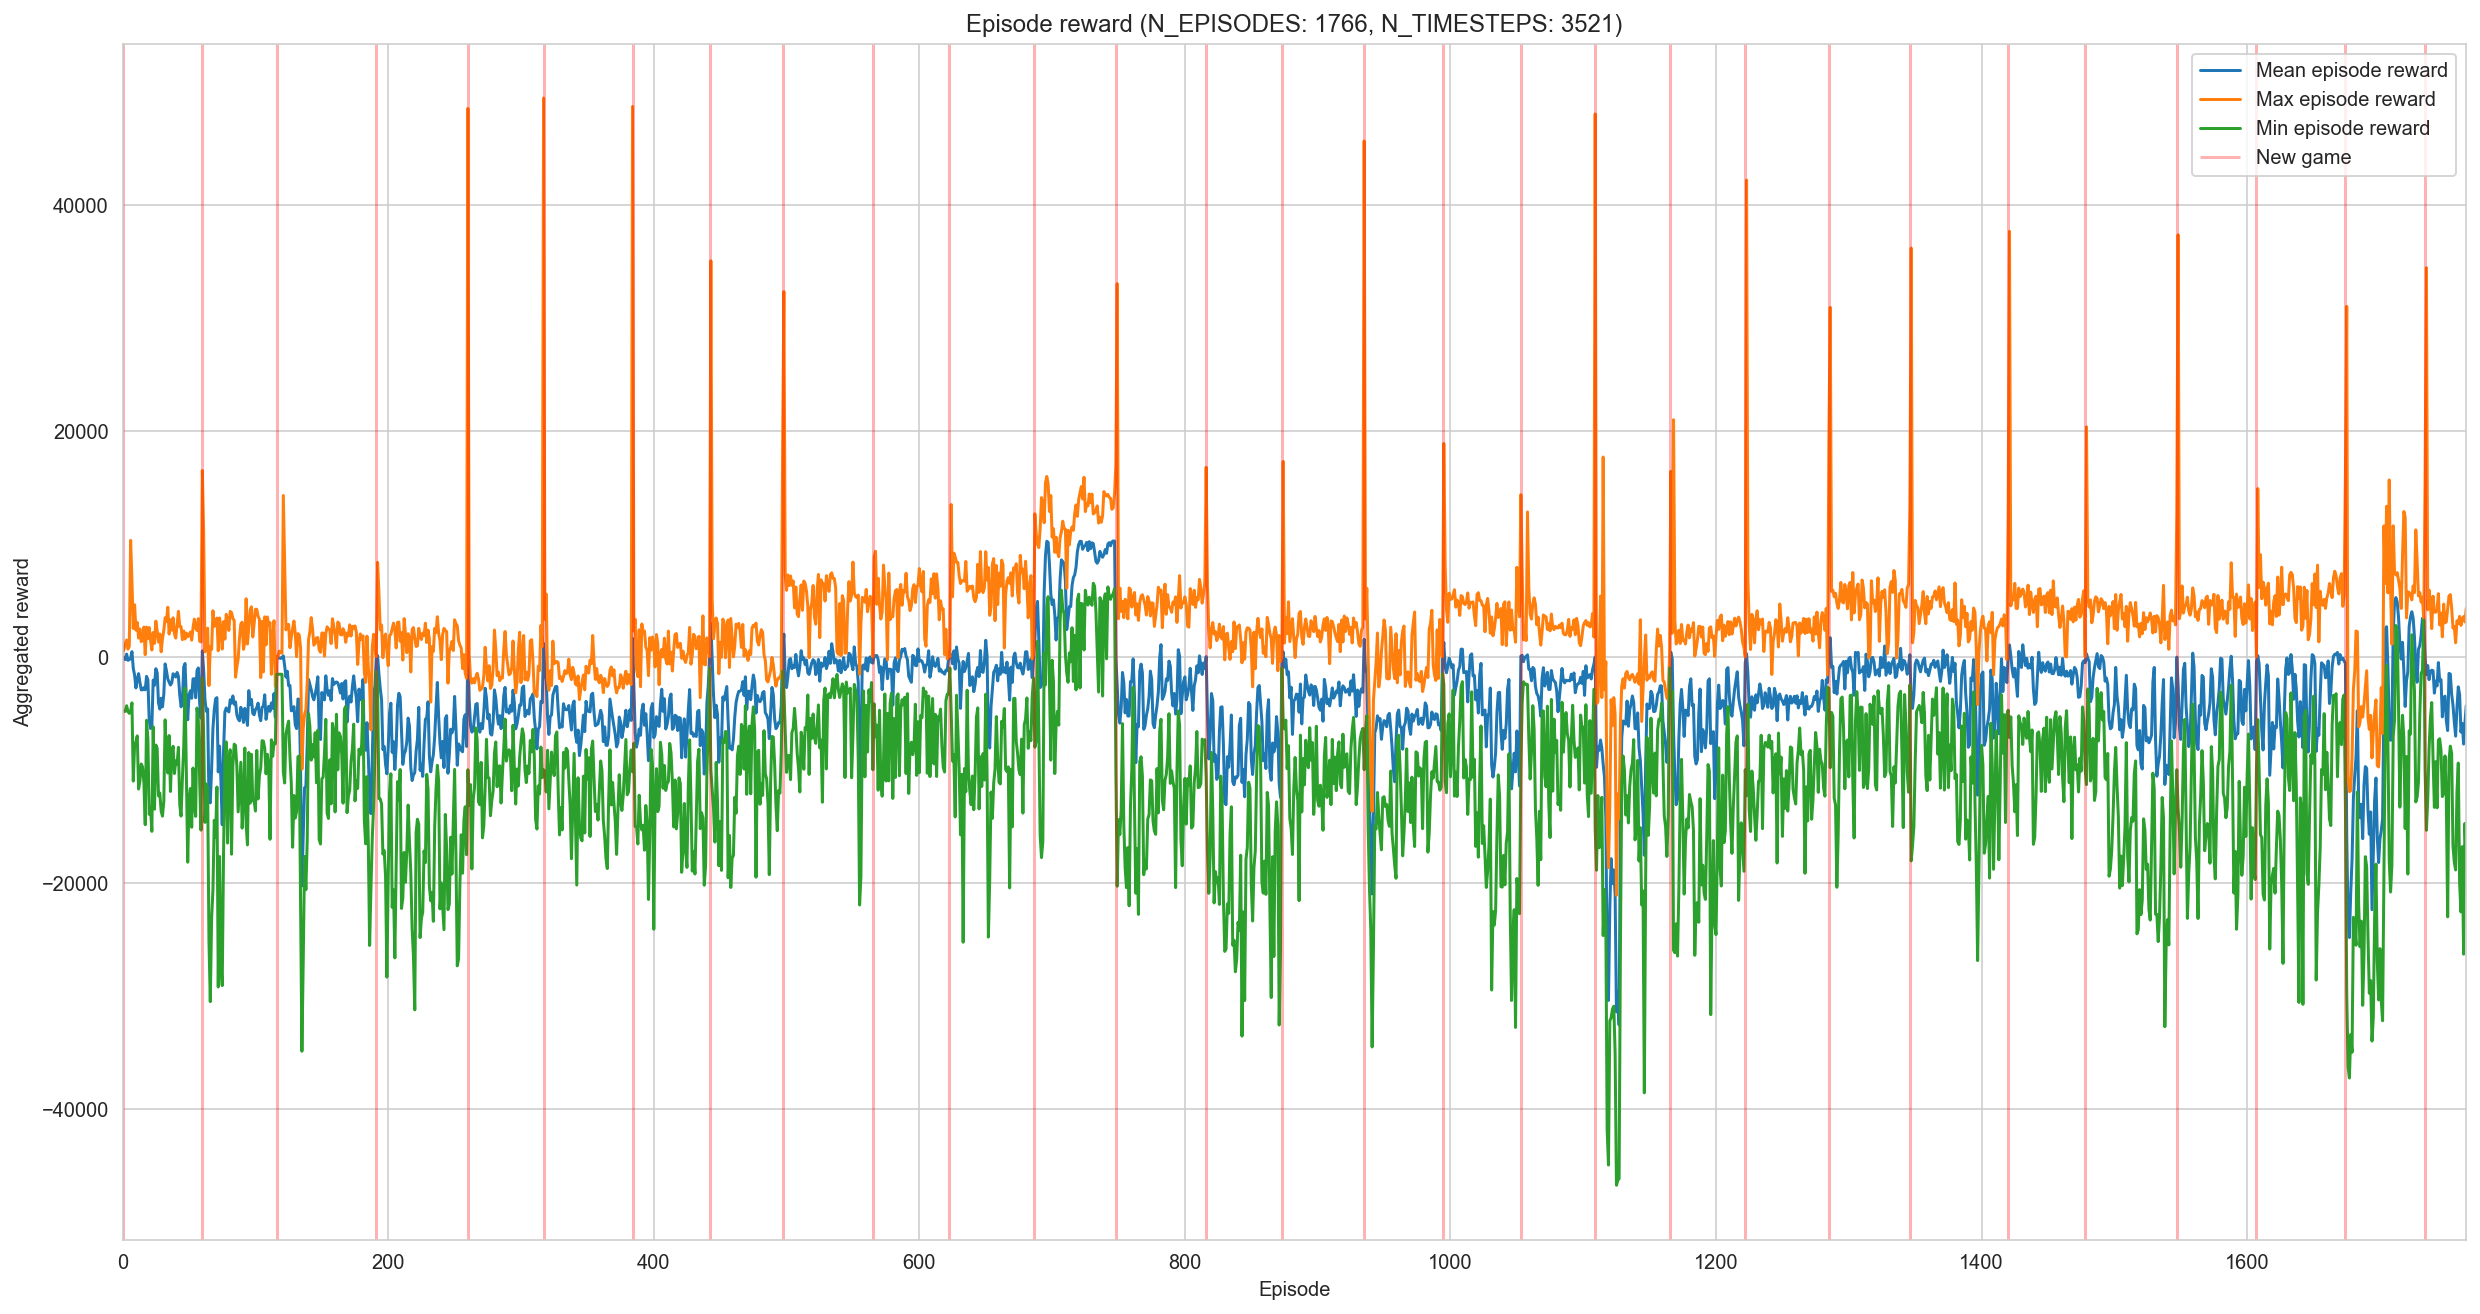

In [10]:
plot_episode_reward(df_reward, df_action)

In [11]:
def plot_mean_episode_reward_reg(df_reward, df_action):
    fig, ax = plt.subplots(figsize=(21, 11))
    df_mean_episode_reward = df_reward.groupby("episode_id", sort=False).mean().reset_index()
    sns.regplot(
        x=df_mean_episode_reward.index,
        y="reward",
        data=df_mean_episode_reward,
        scatter=True,
        marker=".",
        ax=ax,
        label="Mean episode reward",
        line_kws={"label": "OLS fit"},
    )
    df_episode_game_id = df_reward.groupby("episode_id", sort=False)["gameId"].first().reset_index()
    ax.vlines(
        df_episode_game_id[df_episode_game_id["gameId"].shift() != df_episode_game_id["gameId"]].index,
        0,
        1,
        transform=ax.get_xaxis_transform(),
        colors="r",
        alpha=0.3,
        label="New game",
    )
    ax.set_xlabel("Episode")
    ax.set_ylabel("Aggregated reward")
    ax.legend()
    ax.set_title(
        f"Mean episode reward (N_EPISODES: {df_reward['episode_id'].nunique()}, N_TIMESTEPS: {len(df_action)})"
    )
    ax.margins(x=0)

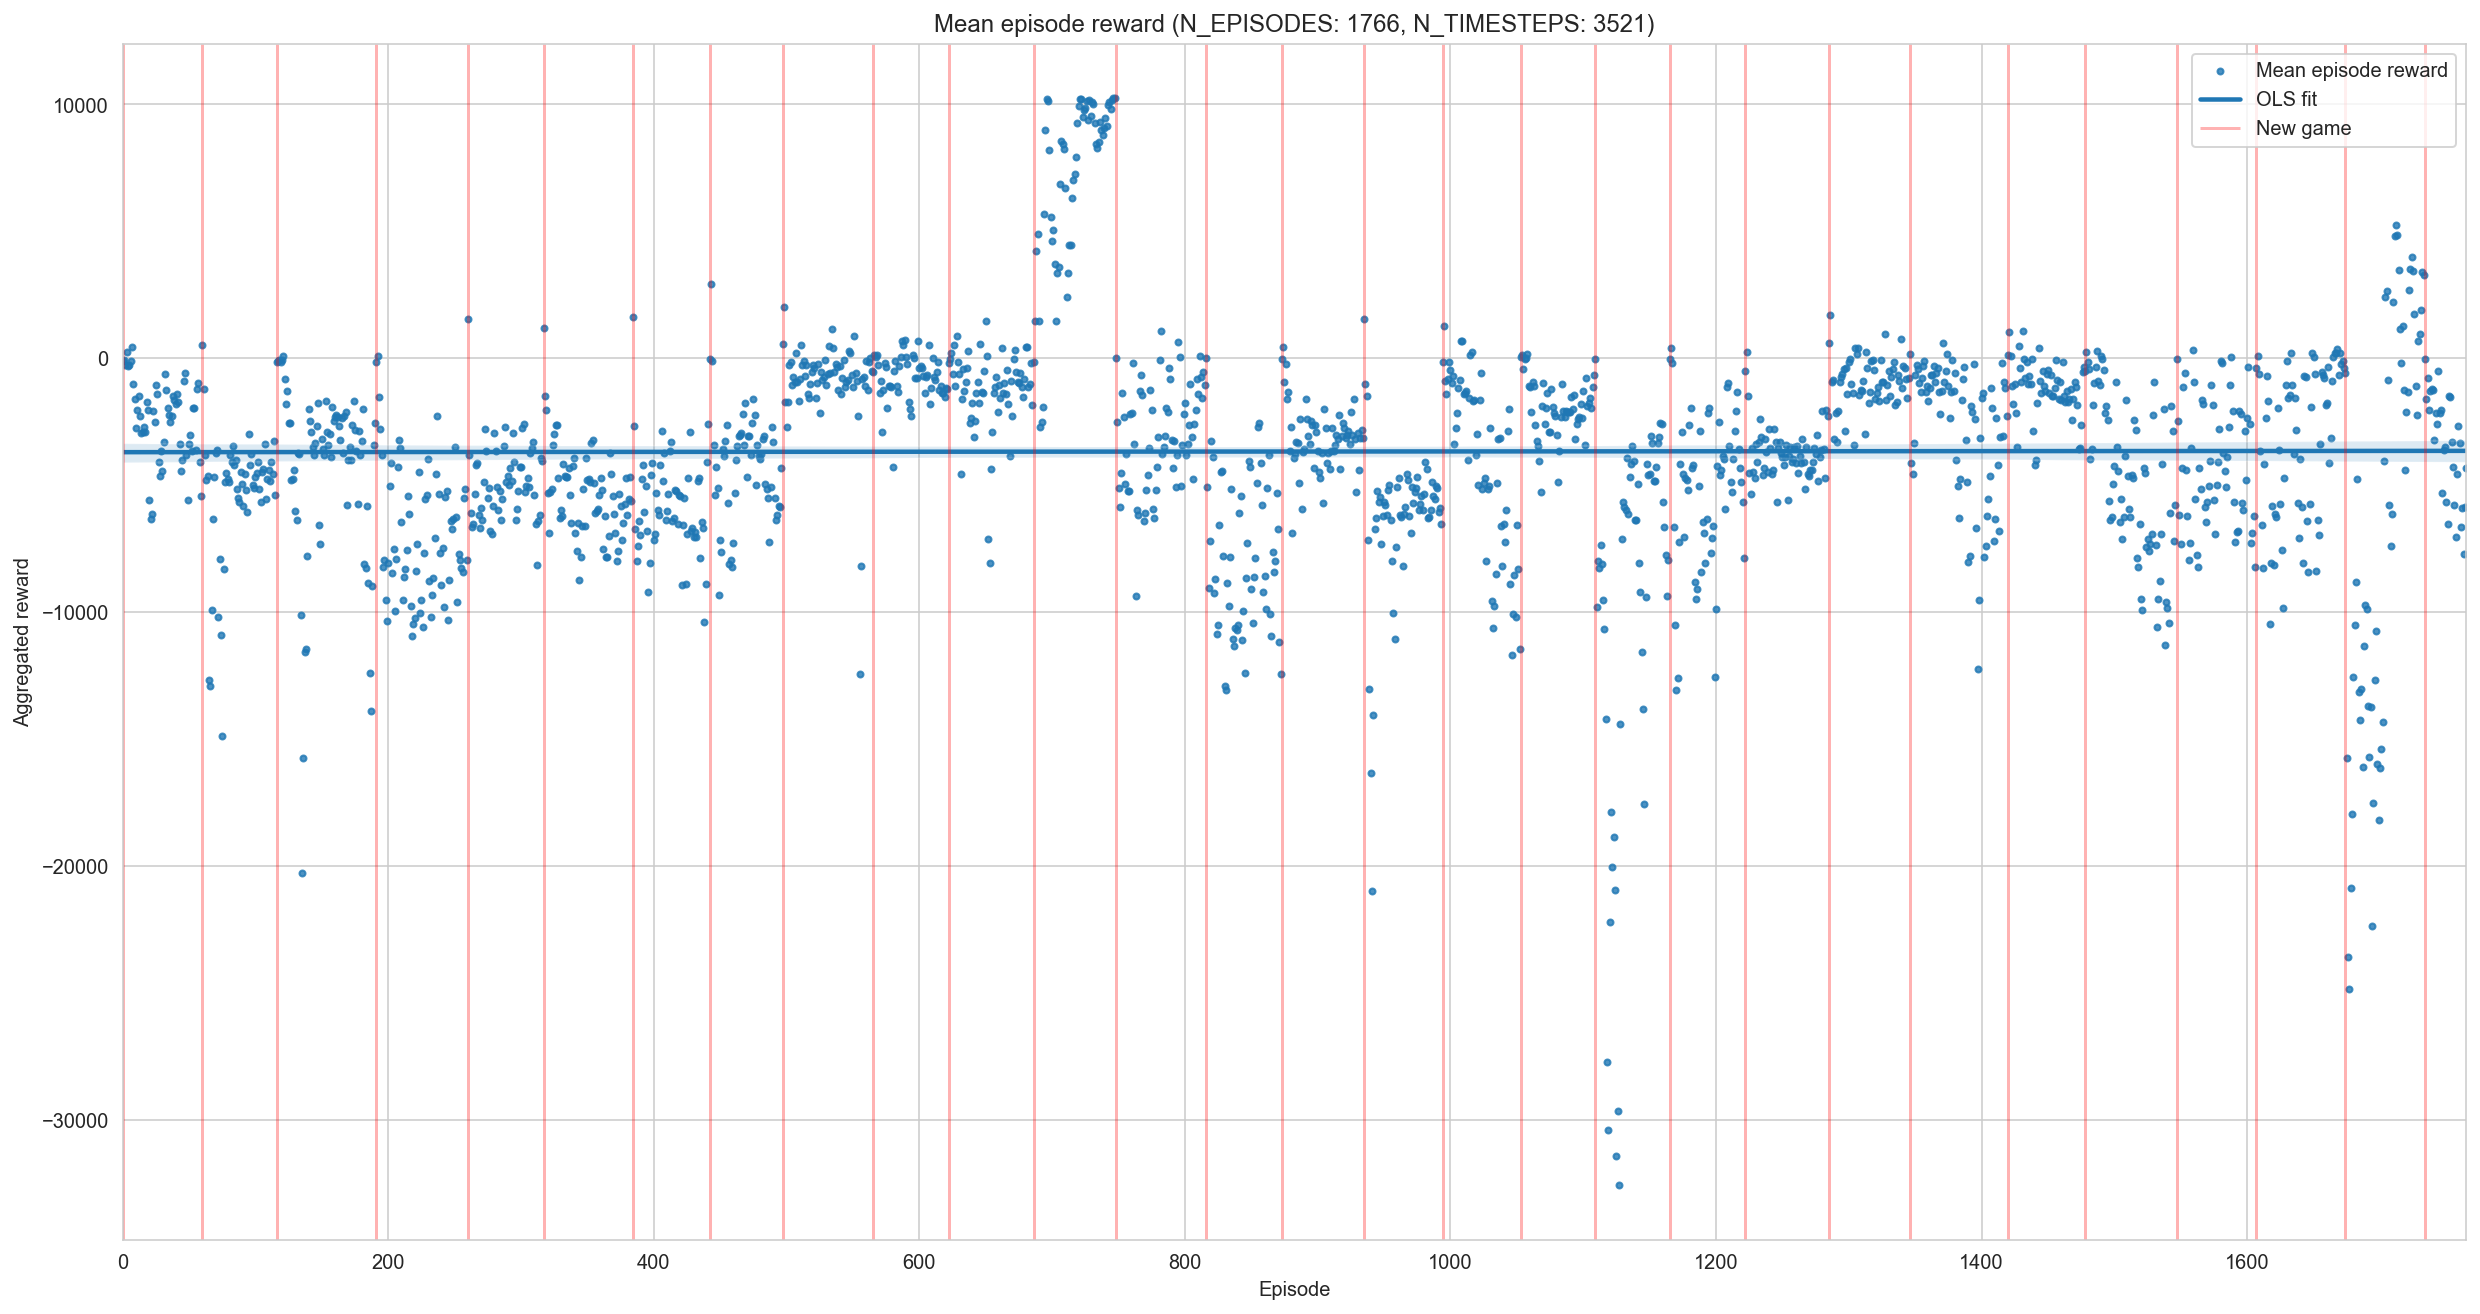

In [12]:
plot_mean_episode_reward_reg(df_reward, df_action)